In [179]:
import numpy as np
import pandas as pd

# Series

cSeries= pd.Series([123,243,432,232,456,432])
cSeries.name ="Nabheet series"
cSeries
cSeries.dtype
cSeries.values
type(cSeries.values)
cSeries[0]
cSeries.index=["India", "USA", "Russia", "China", "Japan", "India2"]
cSeries
cSeries = pd.Series([123,243,432,232,456,432], index=["India", "USA", "Russia", "China", "Japan", "India2"])
cSeries
cSeries=pd.Series({'India':123, 'USA':243, 'Russia':432, 'China':232, 'Japan':456, 'India2':432},name="Nabheet series")
cSeries

India     123
USA       243
Russia    432
China     232
Japan     456
India2    432
Name: Nabheet series, dtype: int64

In [180]:
cSeries["India"]
cSeries.iloc[0]
cSeries[["India","USA"]]
cSeries>200
cSeries[cSeries>250]
cSeries.mean()
cSeries[cSeries>250].mean()
cSeries[(cSeries>200) & (cSeries<300)]




USA      243
China    232
Name: Nabheet series, dtype: int64

In [181]:
# Dataframes
df = pd.DataFrame({
    'Population':[123,233,212,211],
    'Profit':[12,23,21,21],
    'City':['New York','Chicago','San Francisco','Los Angeles']

},columns=['City','Population','Profit'])
df.index=['New York','Chicago','San Francisco','Los Angeles']


df.columns

df.index
df.info()
df.size
df.shape
df.describe()
df.dtypes
df.dtypes.value_counts()
df['City']
df.loc['Chicago'].to_frame()
df.loc['Chicago']['City']
df.drop('Chicago')
lg = pd.Series(['Hindi','Punjabi'],index=['New York','Chicago'],name='Language')
df['Language']=lg
df

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, New York to Los Angeles
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        4 non-null      object
 1   Population  4 non-null      int64 
 2   Profit      4 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 128.0+ bytes


,City,Population,Profit,Language
New York,New York,123,12,Hindi
Chicago,Chicago,233,23,Punjabi
San Francisco,San Francisco,212,21,NaN
Los Angeles,Los Angeles,211,21,NaN


In [182]:
df
df['per profilt'] = df['Profit']/ df['Population']
df

,City,Population,Profit,Language,per profilt
New York,New York,123,12,Hindi,0.097561
Chicago,Chicago,233,23,Punjabi,0.098712
San Francisco,San Francisco,212,21,NaN,0.099057
Los Angeles,Los Angeles,211,21,NaN,0.099526


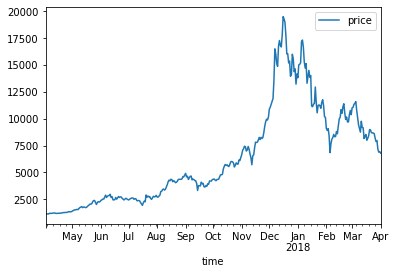

In [183]:
# Files handling
import matplotlib.pyplot as plt
filesdata= pd.read_csv('btc-market-price.csv',header=None)
filesdata.head()
filesdata.columns=['date','price']
filesdata.head()
filesdata.dtypes
filesdata.shape
filesdata.dtypes
pd.to_datetime(filesdata['date']).head()
filesdata['time']=pd.to_datetime(filesdata['date'])
filesdata= pd.read_csv('btc-market-price.csv',header=None,index_col=0,parse_dates=True,names=['time','price'])
filesdata.head()
filesdata.plot()
# plt.plot(filesdata.index,filesdata['price'])
# x = np.arange(-10,11)
# plt.plot(x,x**2)
df['Sex'] ='M'


In [184]:
# Data cleaning

pd.isnull(np.nan)
pd.isnull(1)
pd.isna(None)
s = pd.Series(['a', 3, np.nan, 1, np.nan])

print(s.notnull().sum())

# df
df.isnull().count()
df.info()
df.fillna("NA")
df.fillna(method='ffill',axis=1)


3
<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, New York to Los Angeles
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         4 non-null      object 
 1   Population   4 non-null      int64  
 2   Profit       4 non-null      int64  
 3   Language     2 non-null      object 
 4   per profilt  4 non-null      float64
 5   Sex          4 non-null      object 
dtypes: float64(1), int64(2), object(3)
memory usage: 396.0+ bytes


,City,Population,Profit,Language,per profilt,Sex
New York,New York,123,12,Hindi,0.097561,M
Chicago,Chicago,233,23,Punjabi,0.098712,M
San Francisco,San Francisco,212,21,21,0.099057,M
Los Angeles,Los Angeles,211,21,21,0.099526,M


In [185]:
df.loc['New York']['Sex'] = 'D'
s = pd.Series([np.nan, 1, 2, np.nan, 3])
s = s.fillna(method='ffill')

print(s)

0    NaN
1    1.0
2    2.0
3    2.0
4    3.0
dtype: float64


/Library/Python/3.8/site-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


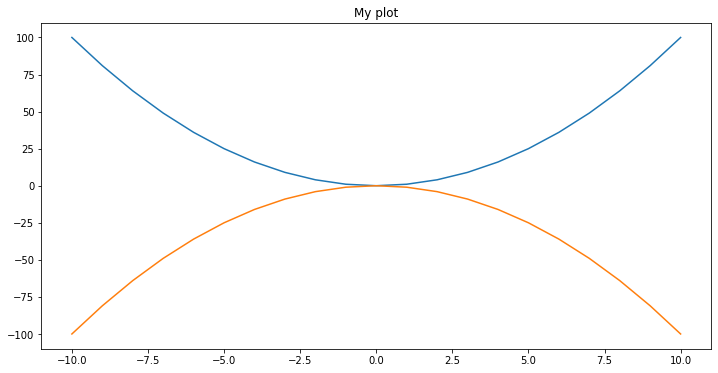

In [186]:
x = np.arange(-10,11)
plt.figure( figsize=(12,6)) 
plt.title('My plot')
plt.plot(x,x**2)
plt.plot(x,-1*(x**2))

In [187]:
!pip3 install sqlalchemy

Defaulting to user installation because normal site-packages is not writeable


In [188]:
import sqlite3
import os.path

BASE_DIR = os.path.dirname(os.path.abspath('DA-Pandas.ipynb'))
db_path = os.path.join(BASE_DIR, "chinook.db")

print(db_path)
conn = sqlite3.connect(db_path)
cur = conn.cursor()
cur.execute('SELECT * FROM employees LIMIT 5;')
df = pd.DataFrame(cur.fetchall())
cur.close()
conn.close()

/Users/nabheetmadan/Documents/Python/freeCodeCampSciPython/chinook.db


In [199]:
def calculate(list):
    if len(list) != 9:
        raise ValueError('List must contain nine numbers.')
    array=np.reshape(list,(3,3))
    thisdict = {
         'mean': [np.mean(array,axis=0).tolist(), np.mean(array,axis=1).tolist(), np.mean(array.flat)],
        'variance': [np.var(array,axis=0).tolist(), np.var(array,axis=1).tolist(), np.var(array.flat)],
        'standard deviation': [np.std(array,axis=0).tolist(), np.std(array,axis=1).tolist(), np.std(array.flat)],
        'max': [np.max(array,axis=0).tolist(), np.max(array,axis=1).tolist(), np.max(array.flat)],
        'min': [np.min(array,axis=0).tolist(), np.min(array,axis=1).tolist(), np.min(array.flat)],
        'sum': [np.sum(array,axis=0).tolist(), np.sum(array,axis=1).tolist(), np.sum(array.flat)]
    }
    return thisdict

    # return calculations
calculate([0,1,2,3,4,5,6,7,8])

{'mean': [[3.0, 4.0, 5.0], [1.0, 4.0, 7.0], 4.0],
 'variance': [[6.0, 6.0, 6.0],
  [0.6666666666666666, 0.6666666666666666, 0.6666666666666666],
  6.666666666666667],
 'standard deviation': [[2.449489742783178,
   2.449489742783178,
   2.449489742783178],
  [0.816496580927726, 0.816496580927726, 0.816496580927726],
  2.581988897471611],
 'max': [[6, 7, 8], [2, 5, 8], 8],
 'min': [[0, 1, 2], [0, 3, 6], 0],
 'sum': [[9, 12, 15], [3, 12, 21], 36]}

In [268]:
def calculate_demographic_data(print_data=True):
    # Read data from file
    df = pd.read_csv('adult-data.csv')
   
    # print(df[( (df['education']=='Bachelors') | (df['education'] =='Masters')| (df['education'] =='Doctorate') ) & (df['salary'] =='>50K') ]['education'].count() )
    # How many of each race are represented in this dataset? This should be a Pandas series with race names as the index labels.
    race_count = df.value_counts(['race']).tolist()

    # What is the average age of men?
    average_age_men = round(df[df['sex']=='Male']['age'].mean(),1)

    # What is the percentage of people who have a Bachelor's degree?
    percentage_bachelors = round((df[df['education']=='Bachelors']['education'].count() / df['education'].count())*100,1)

    # What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
    # What percentage of people without advanced education make more than 50K?

    # with and without `Bachelors`, `Masters`, or `Doctorate`
    higher_education = ((df[( (df['education']=='Bachelors') | (df['education'] =='Masters')| (df['education'] =='Doctorate') ) & (df['salary'] =='>50K') ]['education'].count())/(df[( (df['education']=='Bachelors') | (df['education'] =='Masters')| (df['education'] =='Doctorate') ) ]['education'].count()))*100
    lower_education = None

    # percentage with salary >50K
    higher_education_rich = round(((df[( (df['education']=='Bachelors') | (df['education'] =='Masters')| (df['education'] =='Doctorate') ) & (df['salary'] =='>50K') ]['education'].count())/(df[( (df['education']=='Bachelors') | (df['education'] =='Masters')| (df['education'] =='Doctorate') ) ]['education'].count()))*100,1)
    lower_education_rich = round(((df[( (df['education']!='Bachelors') & (df['education'] !='Masters')& (df['education'] !='Doctorate') ) & (df['salary'] =='>50K') ]['education'].count())/(df[( (df['education']!='Bachelors') & (df['education'] !='Masters')& (df['education'] !='Doctorate') ) ]['education'].count()))*100,1)

    # What is the minimum number of hours a person works per week (hours-per-week feature)?
    min_work_hours = df['hours-per-week'].min()

    # What percentage of the people who work the minimum number of hours per week have a salary of >50K?
    num_min_workers = df[df['hours-per-week'] == min_work_hours]['salary'].count()
    # print(num_min_workers)
    rich_percentage = ((df[(df['hours-per-week'] == min_work_hours) & (df['salary'] =='>50K')]['salary'].count()) / (num_min_workers))*100

    # What country has the highest percentage of people that earn >50K?
    # print(df.groupby('native-country').size())
    highest_earning_country = (df[df['salary'] == '>50K'].groupby('native-country').size()/df.groupby('native-country').size()).sort_values(ascending=False).index[0]
    highest_earning_country_percentage = round(((df[df['salary'] == '>50K'].groupby('native-country').size()/df.groupby('native-country').size()).sort_values(ascending=False).iloc[0])*100,1)

    # Identify the most popular occupation for those who earn >50K in India.
    top_IN_occupation = df[(df['native-country'] == 'India') & (df['salary'] == '>50K')].groupby('occupation').size().sort_values(ascending=False).index[0]

    # DO NOT MODIFY BELOW THIS LINE

    if print_data:
        print("Number of each race:\n", race_count) 
        print("Average age of men:", average_age_men)
        print(f"Percentage with Bachelors degrees: {percentage_bachelors}%")
        print(f"Percentage with higher education that earn >50K: {higher_education_rich}%")
        print(f"Percentage without higher education that earn >50K: {lower_education_rich}%")
        print(f"Min work time: {min_work_hours} hours/week")
        print(f"Percentage of rich among those who work fewest hours: {rich_percentage}%")
        print("Country with highest percentage of rich:", highest_earning_country)
        print(f"Highest percentage of rich people in country: {highest_earning_country_percentage}%")
        print("Top occupations in India:", top_IN_occupation)

    return {
        'race_count': race_count,
        'average_age_men': average_age_men,
        'percentage_bachelors': percentage_bachelors,
        'higher_education_rich': higher_education_rich,
        'lower_education_rich': lower_education_rich,
        'min_work_hours': min_work_hours,
        'rich_percentage': rich_percentage,
        'highest_earning_country': highest_earning_country,
        'highest_earning_country_percentage':
        highest_earning_country_percentage,
        'top_IN_occupation': top_IN_occupation
    }
calculate_demographic_data()

Number of each race:
 [27816, 3124, 1039, 311, 271]
Average age of men: 39.4
Percentage with Bachelors degrees: 16.4%
Percentage with higher education that earn >50K: 46.5%
Percentage without higher education that earn >50K: 17.4%
Min work time: 1 hours/week
Percentage of rich among those who work fewest hours: 10.0%
Country with highest percentage of rich: Iran
Highest percentage of rich people in country: 41.9%
Top occupations in India: Prof-specialty


{'race_count': [27816, 3124, 1039, 311, 271],
 'average_age_men': 39.4,
 'percentage_bachelors': 16.4,
 'higher_education_rich': 46.5,
 'lower_education_rich': 17.4,
 'min_work_hours': 1,
 'rich_percentage': 10.0,
 'highest_earning_country': 'Iran',
 'highest_earning_country_percentage': 41.9,
 'top_IN_occupation': 'Prof-specialty'}